In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [37]:
#Data collection
data = yf.download(tickers='MCD', start='2015-1-1', end='2023-12-31')
data = data['Close']
data

[*********************100%***********************]  1 of 1 completed


Ticker,MCD
Date,
2015-01-02,93.260002
2015-01-05,92.230003
2015-01-06,92.400002
2015-01-07,94.010002
2015-01-08,94.360001
...,...
2023-12-22,291.700012
2023-12-26,292.859985
2023-12-27,294.549988


In [38]:
# Data collection for future accuracy checking
actual_df = yf.download(tickers='MCD',start='2023-12-28',end='2024-1-31')
actual_df = actual_df['Close']
actual_df.columns = ['Close']
actual_df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2023-12-28,295.839996
2023-12-29,296.510010
2024-01-02,297.040009
2024-01-03,294.390015
2024-01-04,291.739990
2024-01-05,288.989990
2024-01-08,291.899994
2024-01-09,290.869995
2024-01-10,294.089996


In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

sequence_length = 50
x, y = create_sequences(data_scaled, sequence_length)

In [40]:
# Reshape input to [samples, time steps, features]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [41]:
# Split into training and testing sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [42]:
x_train

array([[[0.021371  ],
        [0.01645759],
        [0.01726853],
        ...,
        [0.03563422],
        [0.03611124],
        [0.0399275 ]],

       [[0.01645759],
        [0.01726853],
        [0.02494873],
        ...,
        [0.03611124],
        [0.0399275 ],
        [0.03525258]],

       [[0.01726853],
        [0.02494873],
        [0.02661834],
        ...,
        [0.0399275 ],
        [0.03525258],
        [0.03921195]],

       ...,

       [[0.83780948],
        [0.82688543],
        [0.82116114],
        ...,
        [0.71621426],
        [0.69904119],
        [0.712398  ]],

       [[0.82688543],
        [0.82116114],
        [0.82349855],
        ...,
        [0.69904119],
        [0.712398  ],
        [0.70285738]],

       [[0.82116114],
        [0.82349855],
        [0.80584835],
        ...,
        [0.712398  ],
        [0.70285738],
        [0.72260646]]])

In [43]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Training model
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0581 - val_loss: 0.0024
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.1015e-04 - val_loss: 0.0014
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.1978e-04 - val_loss: 0.0013
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3936e-04 - val_loss: 0.0019
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.6270e-04 - val_loss: 0.0012
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.7696e-04 - val_loss: 0.0028
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.8982e-04 - val_loss: 0.0011
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4346e-04 - val_loss: 9.7574e-04
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6539e-04 - val_loss: 0.0011
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5807e-04 - val_loss: 8.1213e-04
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2170e-04 - val_loss: 7.7844e-04
Epoch 12/50

In [45]:
# Predict using test set
y_pred_scaled = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [46]:
# Inverse transform the scaled data
y_test = scaler.inverse_transform([y_test]).flatten()
y_pred = scaler.inverse_transform(y_pred_scaled).flatten()

#y_test
#y_pred

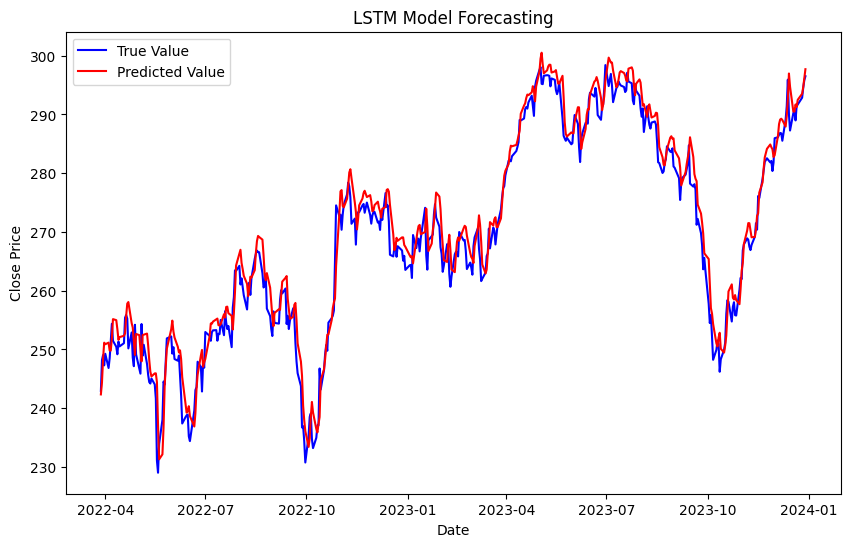

In [47]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='True Value', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Value', color='red')
plt.legend()
plt.title('LSTM Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

**Prediction Accuracy**

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_actual = np.mean(y_test)

# Accuracy Calculation
accuracy = 100 - (rmse / mean_actual * 100)

print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

RMSE: 3.41
Accuracy: 98.73%


**Forecasting**

In [49]:
# Forecast future steps
def forecast_future(model, recent_data, n_steps):
    predictions = []
    current_input = recent_data.copy()

    for _ in range(n_steps):
        prediction = model.predict(current_input[np.newaxis, :, np.newaxis])
        predictions.append(prediction[0, 0])
        current_input = np.roll(current_input, -1)
        current_input[-1] = prediction

    return np.array(predictions)

# Forecast next 30 days
recent_data = data_scaled[-sequence_length:].flatten()
future_steps = 22
future_forecast_scaled = forecast_future(model, recent_data, future_steps)
future_forecast = scaler.inverse_transform(future_forecast_scaled.reshape(-1, 1)).flatten()

print("Future Forecast (Next 30 Days):", future_forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_24088\1723330635.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Future Forecast (Next 30 Days): [298.61243 300.19025 301.91214 303.6805  305.4789  307.30118 309.14346
 311.00317 312.87836 314.76688 316.66617 318.5728  320.4824  322.39014
 324.29062 326.17825 328.04764 329.89337 331.71048 333.49445 335.2412
 336.94717]


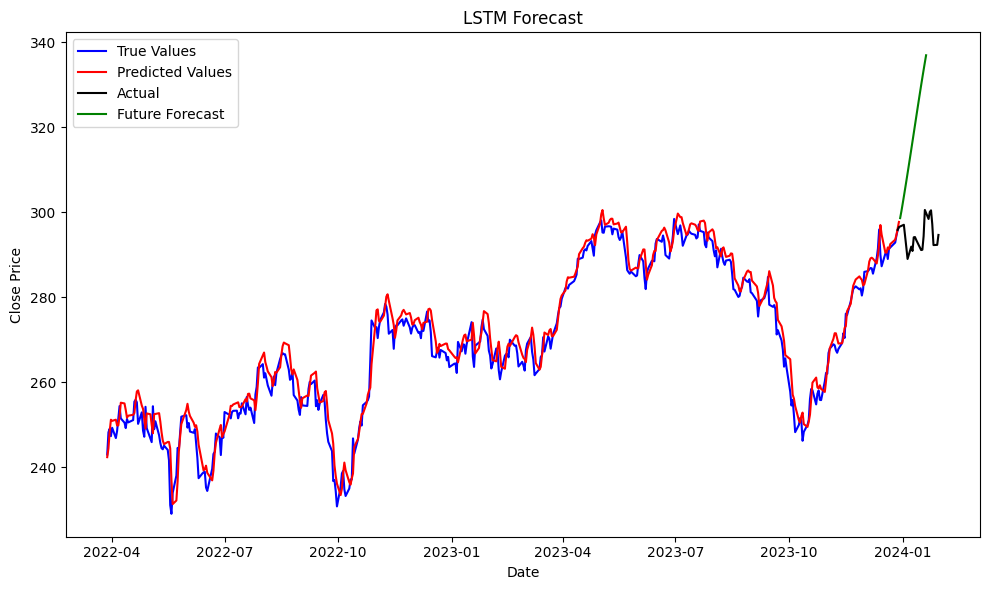

In [50]:
plt.figure(figsize=(10, 6))

# Plot historical true values
plt.plot(data.index[-len(y_test):], y_test, label="True Values", color='blue')

# Plot historical predictions
plt.plot(data.index[-len(y_test):], y_pred, label="Predicted Values", color='red')

# Plot actual values
plt.plot(actual_df['Close'],label='Actual',color='Black')

# Plot future forecast
future_dates = [data.index[-1] + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]
plt.plot(future_dates, future_forecast, label="Future Forecast", color='green')

# Show plot
plt.title("LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

**Prediction**

In [51]:
future_actual_prices = actual_df['Close'].values 

In [52]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_forecast = np.mean(np.abs((future_actual_prices - future_forecast) / future_actual_prices)) * 100

# Calculate accuracy
accuracy_forecast = 100 - mape_forecast

# Print results
print(f"Forecasting Accuracy: {accuracy_forecast:.2f}%")
print(f"MAPE for Forecasting: {mape_forecast:.2f}%")


Forecasting Accuracy: 92.17%
MAPE for Forecasting: 7.83%
